In [1]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [2]:
using JSON

cross_validation_best_key_Jan_AM = readall("../temp_files/cross_validation_best_key_Jan_AM.json")
cross_validation_best_key_Jan_AM = JSON.parse(cross_validation_best_key_Jan_AM)

cross_validation_best_key_Jan_MD = readall("../temp_files/cross_validation_best_key_Jan_MD.json")
cross_validation_best_key_Jan_MD = JSON.parse(cross_validation_best_key_Jan_MD)

cross_validation_best_key_Jan_PM = readall("../temp_files/cross_validation_best_key_Jan_PM.json")
cross_validation_best_key_Jan_PM = JSON.parse(cross_validation_best_key_Jan_PM)

cross_validation_best_key_Jan_NT = readall("../temp_files/cross_validation_best_key_Jan_NT.json")
cross_validation_best_key_Jan_NT = JSON.parse(cross_validation_best_key_Jan_NT)

cross_validation_best_key_Jan_weekend = readall("../temp_files/cross_validation_best_key_Jan_weekend.json")
cross_validation_best_key_Jan_weekend = JSON.parse(cross_validation_best_key_Jan_weekend)

"(8,0.5,100.0,1)"

In [3]:
coeffs_dict_Jan_AM = readall("../temp_files/coeffs_dict_Jan_AM.json")
coeffs_dict_Jan_AM = JSON.parse(coeffs_dict_Jan_AM)

coeffs_dict_Jan_MD = readall("../temp_files/coeffs_dict_Jan_MD.json")
coeffs_dict_Jan_MD = JSON.parse(coeffs_dict_Jan_MD)

coeffs_dict_Jan_PM = readall("../temp_files/coeffs_dict_Jan_PM.json")
coeffs_dict_Jan_PM = JSON.parse(coeffs_dict_Jan_PM)

coeffs_dict_Jan_NT = readall("../temp_files/coeffs_dict_Jan_NT.json")
coeffs_dict_Jan_NT = JSON.parse(coeffs_dict_Jan_NT)

coeffs_dict_Jan_weekend = readall("../temp_files/coeffs_dict_Jan_weekend.json")
coeffs_dict_Jan_weekend = JSON.parse(coeffs_dict_Jan_weekend)


coeffs_best_Jan_AM = coeffs_dict_Jan_AM[cross_validation_best_key_Jan_AM]
coeffs_best_Jan_MD = coeffs_dict_Jan_MD[cross_validation_best_key_Jan_MD]
coeffs_best_Jan_PM = coeffs_dict_Jan_PM[cross_validation_best_key_Jan_PM]
coeffs_best_Jan_NT = coeffs_dict_Jan_NT[cross_validation_best_key_Jan_NT]
coeffs_best_Jan_weekend = coeffs_dict_Jan_weekend[cross_validation_best_key_Jan_weekend]

9-element Array{Any,1}:
  1.0       
 -0.00468972
  0.0531941 
 -0.200611  
  0.620511  
 -0.890784  
  0.947023  
 -0.458351  
  0.109558  

INFO: Loading help data...


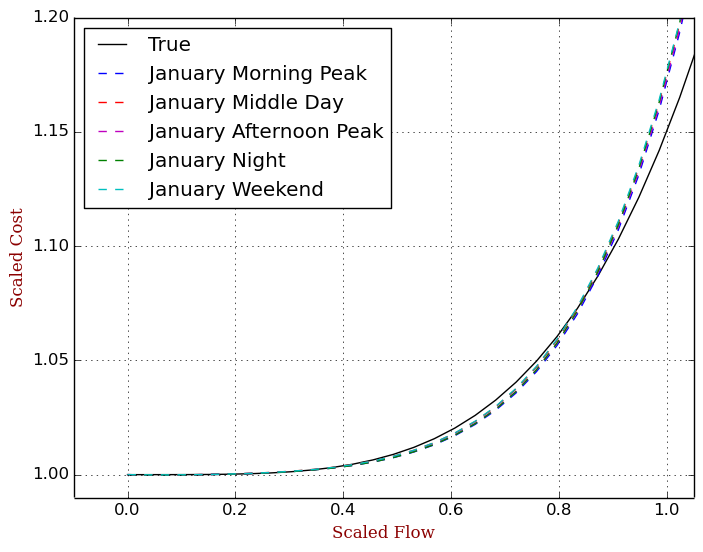

In [4]:
using PyPlot

xs = linspace(0, 1.1, 30)

true_coeffs = [1, 0, 0, 0, .15]
ys_true = map(x->polyEval(true_coeffs, x), xs)
plot(xs, ys_true, "k", label="True")

ys_Jan_AM = map(x->polyEval(coeffs_best_Jan_AM, x), xs)
ys_Jan_MD = map(x->polyEval(coeffs_best_Jan_MD, x), xs)
ys_Jan_PM = map(x->polyEval(coeffs_best_Jan_PM, x), xs)
ys_Jan_NT = map(x->polyEval(coeffs_best_Jan_NT, x), xs)
ys_Jan_weekend = map(x->polyEval(coeffs_best_Jan_weekend, x), xs)

plot(xs, ys_Jan_AM, "--b", label="January Morning Peak")
plot(xs, ys_Jan_MD, "--r", label="January Middle Day")
plot(xs, ys_Jan_PM, "--m", label="January Afternoon Peak")
plot(xs, ys_Jan_NT, "--g", label="January Night")
plot(xs, ys_Jan_weekend, "--c", label="January Weekend")

legend(loc="upper left") 

grid("on")
xlim(-0.1, 1.05);
ylim(0.99, 1.2);

font1 = ["family"=>"serif",
    "color"=>"darkred",
    "weight"=>"normal",
    "size"=>12]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("../temp_files/fitting_comparison_Jan.pdf")

In [31]:
cross_validation_best_key_Apr_MD

"(8,0.5,100.0,1)"